In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Function to read data from a file
def read_data(file_path):
    alpha_data = {}
    with open(file_path, "r") as file:
        for line in file:
            match = re.match(r"(\d+)_(\d+\.\d+)_(\d+):(\d+)", line.strip())
            if match:
                alpha = float(match.group(2))
                steps = int(match.group(4))
                if alpha not in alpha_data:
                    alpha_data[alpha] = []
                alpha_data[alpha].append(steps)
    return alpha_data

# Function to compute mean and standard deviation for each alpha
def compute_stats(alpha_data):
    stats = {}
    for alpha, steps in alpha_data.items():
        stats[alpha] = {
            "mean": np.mean(steps),
            "std_dev": np.std(steps),
            "count": len(steps),
        }
    return stats

In [3]:
# Folder containing the results
RESULT_FOLDER = "sim_4"

# Bot file names and labels
bot_files = ["bot1.txt", "bot2.txt", "bot1_m.txt", "bot2_m.txt"]
labels = ["Bot 1", "Bot 2", "Bot 1 (Moving Rat)", "Bot 2 (Moving Rat)"]
colors = ["blue", "red", "green", "orange"]

# Data storage
all_bot_data = []

# Read and compute stats for each bot
for bot_file in bot_files:
    file_path = os.path.join(RESULT_FOLDER, bot_file)
    if os.path.exists(file_path):
        alpha_data = read_data(file_path)
        stats = compute_stats(alpha_data)
        all_bot_data.append((alpha_data, stats))
    else:
        print(f"File not found: {file_path}")

In [4]:
# Line Plot Function
def plot_line_graph(stats, labels, colors, title):
    plt.figure(figsize=(10, 6))
    for i, (stat, label, color) in enumerate(zip(stats, labels, colors)):
        alphas = sorted(stat.keys())
        means = [stat[alpha]["mean"] for alpha in alphas]
        plt.plot(alphas, means, label=label, color=color, marker="o")

    plt.title(title, fontsize=14)
    plt.xlabel("Alpha", fontsize=12)
    plt.ylabel("Average Steps", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

In [5]:
# Bar Chart with Error Bars
def plot_bar_chart(stats, labels, colors, title):
    alphas = sorted(stats[0].keys())  # Assuming all bots have the same alpha values
    x = np.arange(len(alphas))  # X positions for groups
    width = 0.3  # Width of each bar

    plt.figure(figsize=(12, 7))
    for i, (stat, label, color) in enumerate(zip(stats, labels, colors)):
        means = [stat[alpha]["mean"] for alpha in alphas]
        std_devs = [stat[alpha]["std_dev"] for alpha in alphas]
        plt.bar(
            x + i * width,
            means,
            width,
            yerr=std_devs,
            label=label,
            color=color,
            capsize=5,
        )

    plt.title(title, fontsize=14)
    plt.xlabel("Alpha", fontsize=12)
    plt.ylabel("Mean Steps", fontsize=12)
    plt.xticks(x + width / 2, [f"{alpha:.2f}" for alpha in alphas])
    plt.legend()
    plt.grid(axis="y")
    plt.show()

In [6]:
# Bar Chart with Error Bars
def plot_bar_chart(stats, labels, colors, title):
    alphas = sorted(stats[0].keys())  # Assuming all bots have the same alpha values
    x = np.arange(len(alphas))  # X positions for groups
    width = 0.3  # Width of each bar

    plt.figure(figsize=(12, 7))
    for i, (stat, label, color) in enumerate(zip(stats, labels, colors)):
        means = [stat[alpha]["mean"] for alpha in alphas]
        std_devs = [stat[alpha]["std_dev"] for alpha in alphas]
        plt.bar(
            x + i * width,
            means,
            width,
            yerr=std_devs,
            label=label,
            color=color,
            capsize=5,
        )

    plt.title(title, fontsize=14)
    plt.xlabel("Alpha", fontsize=12)
    plt.ylabel("Mean Steps", fontsize=12)
    plt.xticks(x + width / 2, [f"{alpha:.2f}" for alpha in alphas])
    plt.legend()
    plt.grid(axis="y")
    plt.show()

In [7]:
# Box Plot Function
def plot_box_plot(data, labels, colors, title):
    plt.figure(figsize=(12, 7))
    alphas = sorted(data[0].keys())  # Assuming all bots have the same alpha values

    all_steps = []
    bot_labels = []
    alpha_labels = []

    for bot_data, label in zip(data, labels):
        for alpha in alphas:
            all_steps.extend(bot_data[alpha])
            bot_labels.extend([label] * len(bot_data[alpha]))
            alpha_labels.extend([f"{alpha:.2f}"] * len(bot_data[alpha]))

    sns.boxplot(x=alpha_labels, y=all_steps, hue=bot_labels, palette=colors)

    plt.title(title, fontsize=14)
    plt.xlabel("Alpha", fontsize=12)
    plt.ylabel("Steps", fontsize=12)
    plt.legend(title="Bot", loc="upper right")
    plt.grid(axis="y")
    plt.show()

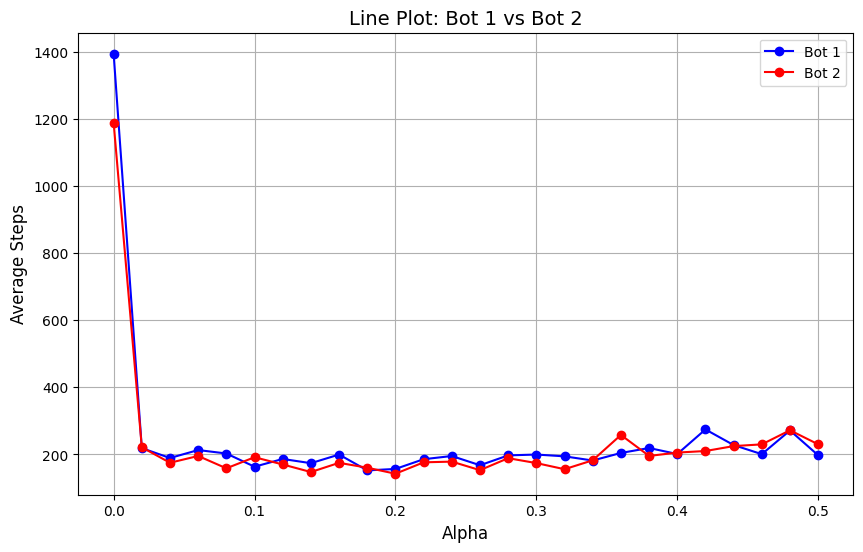

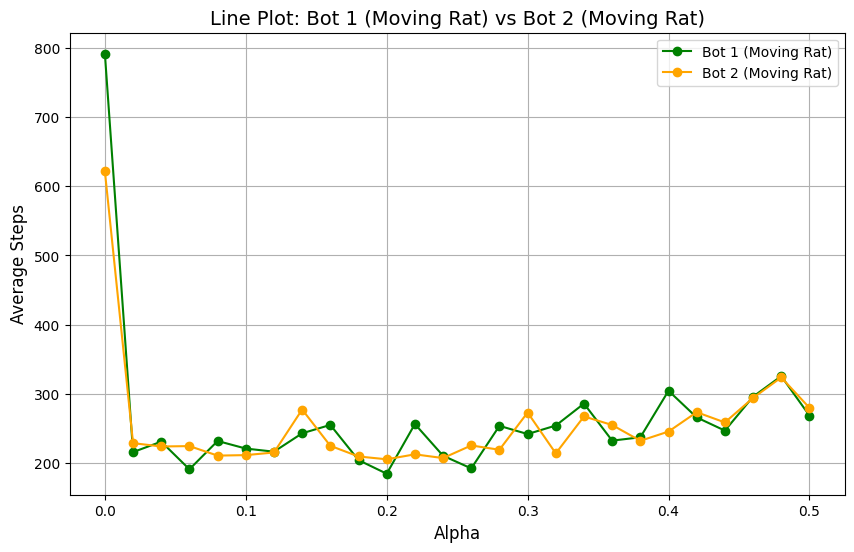

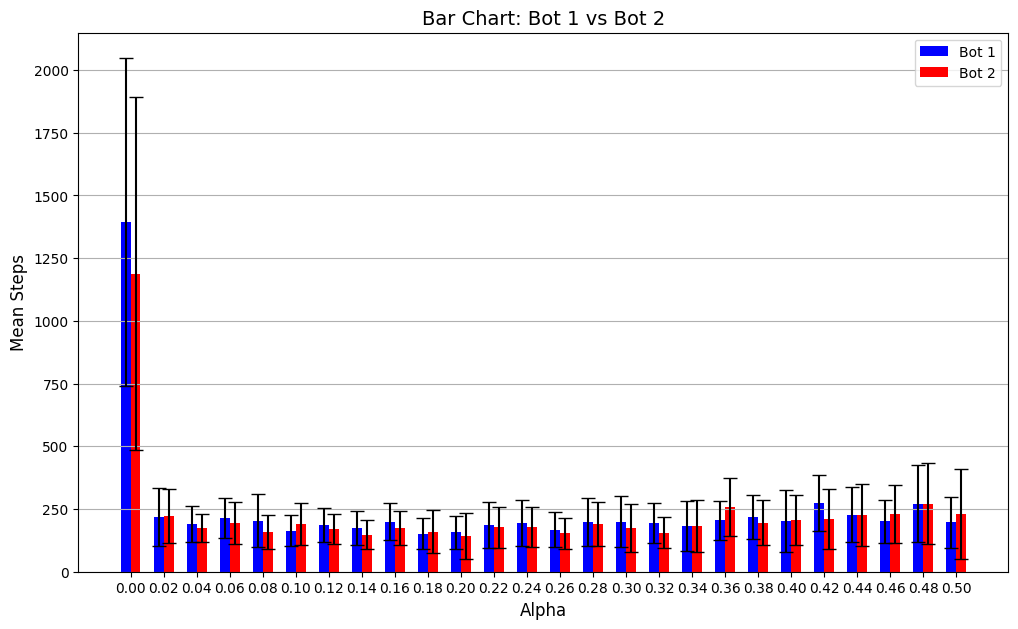

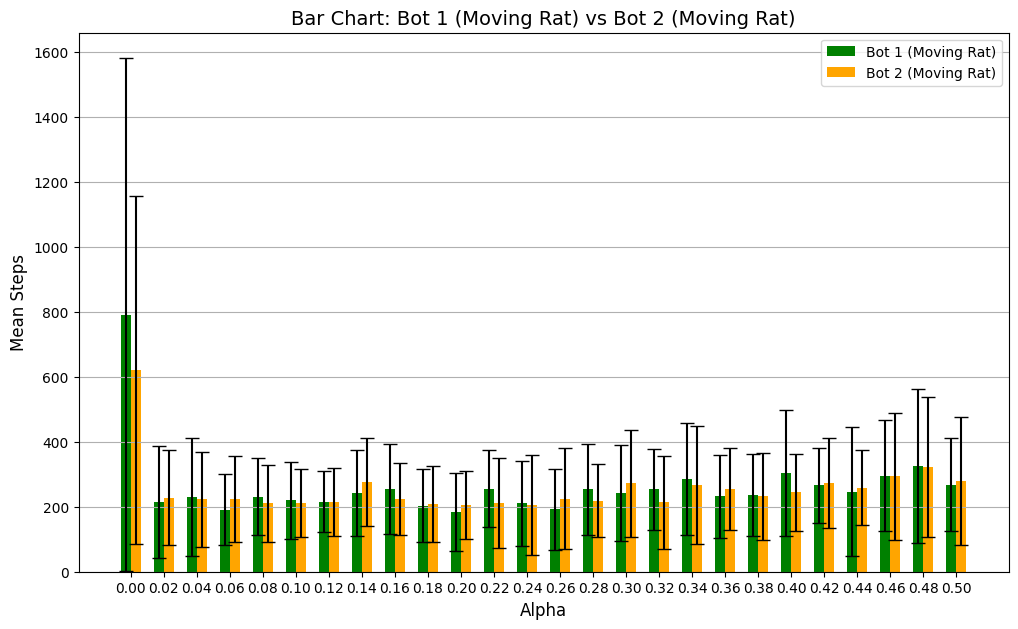

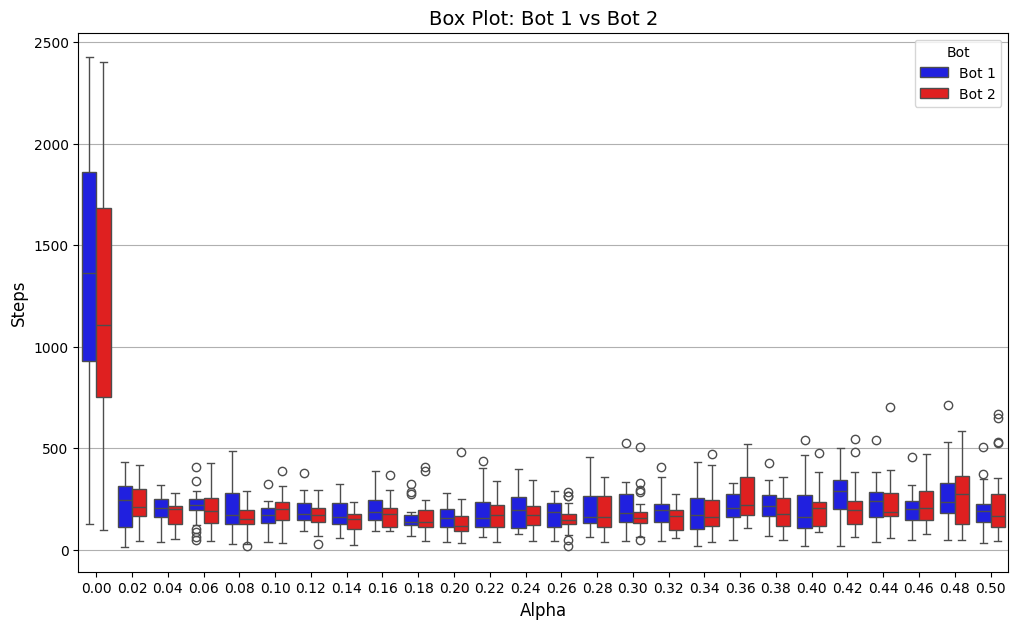

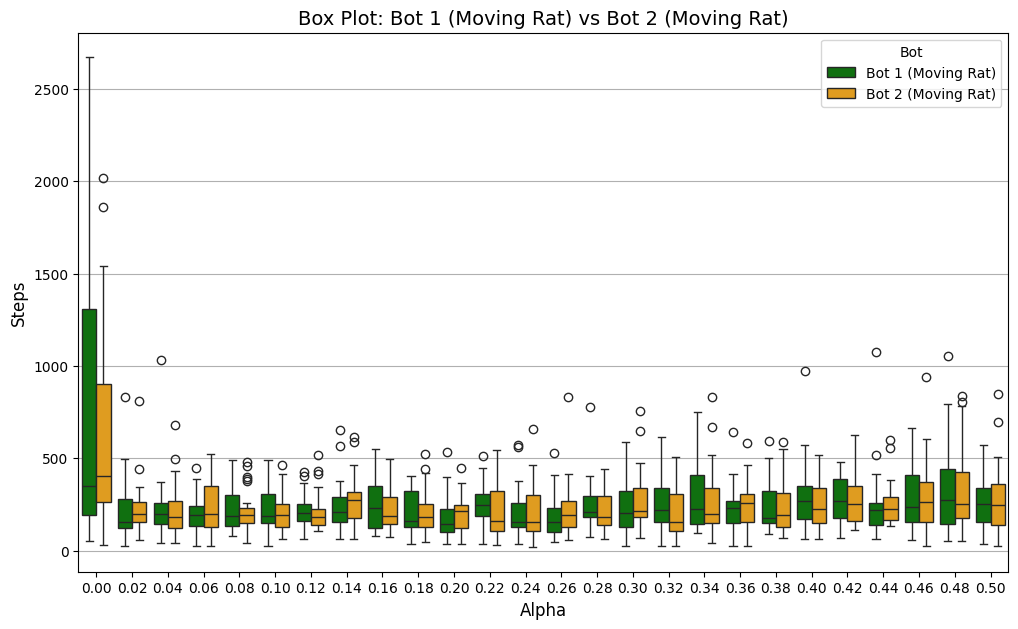

In [8]:
# Line Plot: Bot 1 vs Bot 2
plot_line_graph(
    [all_bot_data[0][1], all_bot_data[1][1]],
    ["Bot 1", "Bot 2"],
    ["blue", "red"],
    "Line Plot: Bot 1 vs Bot 2"
)

# Line Plot: Bot 1 (Moving Rat) vs Bot 2 (Moving Rat)
plot_line_graph(
    [all_bot_data[2][1], all_bot_data[3][1]],
    ["Bot 1 (Moving Rat)", "Bot 2 (Moving Rat)"],
    ["green", "orange"],
    "Line Plot: Bot 1 (Moving Rat) vs Bot 2 (Moving Rat)"
)

# Bar Chart: Bot 1 vs Bot 2
plot_bar_chart(
    [all_bot_data[0][1], all_bot_data[1][1]],
    ["Bot 1", "Bot 2"],
    ["blue", "red"],
    "Bar Chart: Bot 1 vs Bot 2"
)

# Bar Chart: Bot 1 (Moving Rat) vs Bot 2 (Moving Rat)
plot_bar_chart(
    [all_bot_data[2][1], all_bot_data[3][1]],
    ["Bot 1 (Moving Rat)", "Bot 2 (Moving Rat)"],
    ["green", "orange"],
    "Bar Chart: Bot 1 (Moving Rat) vs Bot 2 (Moving Rat)"
)

# Box Plot: Bot 1 vs Bot 2
plot_box_plot(
    [all_bot_data[0][0], all_bot_data[1][0]],
    ["Bot 1", "Bot 2"],
    ["blue", "red"],
    "Box Plot: Bot 1 vs Bot 2"
)

# Box Plot: Bot 1 (Moving Rat) vs Bot 2 (Moving Rat)
plot_box_plot(
    [all_bot_data[2][0], all_bot_data[3][0]],
    ["Bot 1 (Moving Rat)", "Bot 2 (Moving Rat)"],
    ["green", "orange"],
    "Box Plot: Bot 1 (Moving Rat) vs Bot 2 (Moving Rat)"
)